
## The Finite Element Method (FEM) in 1D

This chapter introduces the Finite Element Method (FEM) as a numerical technique for solving two-point boundary value problems (differential equations). The core strategy involves three steps:
1.  **Variational Formulation:** Rewriting the differential equation ("strong form") into an equivalent integral equation ("weak form").
2.  **Discretization:** Replacing the infinite-dimensional function space in the weak form with a finite-dimensional subspace of piecewise linear functions (the "Finite Element Space").
3.  **Linear System:** Deriving and solving a matrix system to find the approximate solution.

These notes are a summary of **Chapter 2** from the text *The FEM: Theory, Implementation, and Applications* by M.G. Larson.

---


### 1. The Model Problem

We begin with a model two-point boundary value problem: find a function $u(x)$ such that
$$
\begin{cases}
-u''(x) = f(x) \quad \text{for } x \in I = [0, L]\\
u(0) = 0, \quad u(L) = 0
\end{cases}
$$

This is the **"strong form"** of the problem.

#### 1.1 Variational Formulation ("Weak Form")

We derive the weak form by multiplying the DE by a **"test function"** $v$ and integrating over the domain $I$:
$$-\int_0^L u''(x)v(x) \,dx = \int_0^L f(x)v(x) \,dx$$

Next, we apply **integration by parts** to the left-hand side:
$$\int_0^L u'(x)v'(x) \,dx - [u'(x)v(x)]_0^L = \int_0^L f(x)v(x) \,dx$$

To simplify this, we introduce a **function space** $V_0$ for our test functions $v$ (and trial function $u$). This space contains functions that have square-integrable derivatives and satisfy the homogeneous boundary conditions:
$$V_0 = \{v \mid ||v||_{L^2} < \infty, ||v'||_{L^2} < \infty, \text{ and } v(0) = v(L) = 0\}$$

By choosing $v \in V_0$, the boundary terms $[u'v]_0^L$ automatically become zero, since $v(0)=0$ and $v(L)=0$.

This gives the final **variational formulation**: Find $u \in V_0$ such that
$$\int_I u'v' \,dx = \int_I fv \,dx \quad \forall v \in V_0$$

#### 1.2 Finite Element Approximation (Galerkin's Method)

The space $V_0$ is infinite-dimensional. We cannot solve this problem directly. The FEM solution is to replace $V_0$ with a finite-dimensional subspace.

We choose $V_{h,0}$, the space of continuous piecewise linear functions that also satisfy the boundary conditions:
$$V_{h,0} = \{v \in V_h \mid v(0) = v(L) = 0\}$$

The basis for this space is the set of *interior* hat functions $$\{\phi_i\}_{i=1}^{n-1}.$$ We exclude $\phi_0$ and $\phi_n$ because they are non-zero at the boundaries.

The **Finite Element Method** is: Find $u_h \in V_{h,0}$ such that
$$\int_I u_h'v' \,dx = \int_I fv \,dx \quad \forall v \in V_{h,0}$$
This is known as a **Galerkin method** because the trial space ($V_{h,0}$) and test space ($V_{h,0}$) are the same.

#### 1.3 Derivation of the Linear System

To solve this, we write the unknown solution $u_h$ as a linear combination of its basis functions (an "ansatz"):
$$u_h(x) = \sum_{j=1}^{n-1} \xi_j \phi_j(x)$$
The $\xi_j$ are $n-1$ unknown coefficients.

The FEM equation must hold for *all* $v \in V_{h,0}$, so it must hold for each basis function $\phi_i$ ($i=1, ..., n-1$). We substitute the ansatz and test against each $\phi_i$:
$$\int_I \left( \sum_{j=1}^{n-1} \xi_j \phi_j' \right) \phi_i' \,dx = \int_I f \phi_i \,dx \quad \text{for } i=1, ..., n-1$$

By linearity of the integral, we can pull the sum and coefficients out:
$$\sum_{j=1}^{n-1} \left( \int_I \phi_i' \phi_j' \,dx \right) \xi_j = \int_I f \phi_i \,dx$$

This is an $(n-1) \times (n-1)$ linear system $A\xi = b$, where:
* **Stiffness Matrix ($A$):** $$A_{ij} = \int_I \phi_i' \phi_j' \,dx$$
* **Load Vector ($b$):** $$b_i = \int_I f \phi_i \,dx$$
* **Solution Vector ($\xi$):** The unknown coefficients $\xi_j$.

---



### 2. Error Analysis

#### 2.1 Galerkin Orthogonality (Theorem 2.1)
This is the most important property of the FEM solution. The error $e = u - u_h$ is **"orthogonal"** to the approximation space $V_{h,0}$ in the integral-of-derivatives sense.
* **Theorem:** $$\int_I (u - u_h)' v' \,dx = 0 \quad \forall v \in V_{h,0}$$
* **Proof:** The weak form holds for $u$: $\int_I u'v' \,dx = \int_I fv \,dx$. The FEM form holds for $u_h$: $\int_I u_h'v' \,dx = \int_I fv \,dx$. Subtracting the two equations gives the result.

#### 2.2 Best Approximation (Theorem 2.2)
Galerkin orthogonality implies that $u_h$ is the **best possible approximation** of $u$ from the space $V_{h,0}$ when measured in the "energy norm" ($||v'||_{L_2}$).
* **Theorem:** $$||(u - u_h)'||_{L_2} \le ||(u - v)'||_{L_2} \quad \forall v \in V_{h,0}$$
* This means no other function in $V_{h,0}$ (including the interpolant $\pi_h u$) can get closer to $u$ in this norm.

#### 2.3 A Priori Error Estimate (Theorem 2.3)
This theorem gives a bound on the error in terms of the (unknown) exact solution $u$ and the mesh size $h$.
* **Theorem:** $$||(u - u_h)'||_{L_2} \le C h ||u''||_{L_2}$$
* This shows the error in the *derivative* converges linearly as the mesh size $h$ goes to zero.

---



### 3. Generalization: Variable Coefficients and Robin BCs

Physical models, like heat transfer $-(AkT')' = f$ or an elastic bar $-(AEu')' = f$, lead to a more general problem with a variable coefficient $a(x)$:
* $-(a(x)u')' = f(x) \quad \text{for } x \in I = [0, L]$

We also introduce more general **Robin boundary conditions**:
* $a(0)u'(0) = \kappa_0(u(0) - g_0)$
* $-a(L)u'(L) = \kappa_L(u(L) - g_L)$


#### 3.1 Variational Formulation
We repeat the process: multiply by $v$ and integrate by parts.
$$\int_I fv \,dx = -\int_I (au')'v \,dx = \int_I au'v' \,dx - [au'v]_0^L$$
$$\int_I fv \,dx = \int_I au'v' \,dx - (a(L)u'(L)v(L) - a(0)u'(0)v(0))$$

Now, we *substitute* the Robin BCs into the boundary terms:
$$\int_I fv \,dx = \int_I au'v' \,dx - (-\kappa_L(u(L)-g_L)v(L) - \kappa_0(u(0)-g_0)v(0))$$

We rearrange this to put all terms with the unknown $u$ on the left and all known data ($f, g_0, g_L$) on the right:
**Find $u \in V$ such that:**
$$\int_I au'v' \,dx + \kappa_L u(L)v(L) + \kappa_0 u(0)v(0) = \int_I fv \,dx + \kappa_L g_L v(L) + \kappa_0 g_0 v(0) \quad \forall v \in V$$

Note: We now use the space $V$, not $V_0$, because $u$ and $v$ are no longer required to be zero at the boundaries.


#### 3.2 FEM and the New Linear System
We discretize by replacing $V$ with $V_h$ (the full space of $n+1$ hat functions, $\{\phi_j\}_{j=0}^n$). The ansatz is now $$u_h = \sum_{j=0}^n \xi_j \phi_j.$$

Plugging this into the variational form and testing against each $\phi_i$ (for $i=0, ..., n$) yields a new $(n+1) \times (n+1)$ linear system:
$$(A + R)\xi = b + r$$

This system is composed of four parts:
1.  **Stiffness Matrix ($A$):** $$A_{ij} = \int_I a(x) \phi_j' \phi_i' \,dx$$
2.  **Boundary Matrix ($R$):** $$R_{ij} = \kappa_L \phi_j(L)\phi_i(L) + \kappa_0 \phi_j(0)\phi_i(0)$$
    This matrix is all zeros except $R_{00} = \kappa_0$ and $R_{nn} = \kappa_L$
3.  **Load Vector ($b$):** $$b_i = \int_I f(x) \phi_i(x) \,dx$$
4.  **Boundary Vector ($r$):** $$r_i = \kappa_L g_L \phi_i(L) + \kappa_0 g_0 \phi_i(0)$$
    This vector is all zeros except $r_0 = \kappa_0 g_0$ and $r_n = \kappa_L g_L$

The matrix $A+R$ is assembled element-by-element.

---


### 4. Adaptive Finite Element Methods (AFEM)

The error estimates we discussed earlier (like $||(u - u_h)'||_{L_2} \le C h ||u''||_{L_2}$) are called **a priori estimates**. They are "a priori" (from before) because they tell us *in theory* how the error will behave as $h \to 0$.

- **The Problem:** These estimates are not practical for checking the error of a *specific* calculation. They depend on $||u''||_{L_2}$, which is a property of the **exact solution $u$**—the very function we are trying to find!

- **The Solution: *A Posteriori* Estimates**
This approach is "a posteriori" (from after) because it uses the *computed solution $u_h$* to estimate the true error $e = u - u_h$.

The core idea is to measure how well our computed solution $u_h$ actually solves the original differential equation. This "leftover" part is called the **residual**.

1.  **The Residual:** The original DE is $f + u'' = 0$. We define the residual $R(u_h)$ as what we get when we plug in our approximate solution $u_h$:
    $R(u_h) = f(x) + u_h''(x)$
    If $u_h$ were the exact solution, $R(u_h)$ would be zero. Where $R(u_h)$ is large, our solution is "wrong."

2.  **The Error Estimator ($\eta$):** We can prove that the true error $e$ is related to this residual. The *a posteriori* error estimate is given by $\eta$, which is assembled from local error indicators $\eta_i$ on each element.

This is formally stated in the text:

> **Proposition 2.1 (A Posteriori Error Estimate):**
> The finite element solution $u_h$ satisfies
> $||(u - u_h)'||_{L_2} \le C \eta$
> where $\eta$ is the error estimator defined by
> $\eta = \left( \sum_{i=1}^n \eta_i(u_h)^2 \right)^{1/2}$
> and $\eta_i(u_h)$ is the **element residual** for element $I_i$:
> $\eta_i(u_h) = h_i ||f + u_h''||_{L_2(I_i)}$

**What this Proposition Means:**
* It provides a *computable* upper bound for the true error in the derivative.
* The total error estimator $\eta$ is the (vector) sum of the local error indicators $\eta_i$.
* To reduce the total error, we must reduce the elements $\eta_i$ that are largest.

**A Key Simplification for Linear Elements:**
The formula $\eta_i(u_h) = h_i ||f + u_h''||_{L_2(I_i)}$ looks complex, but for our standard piecewise **linear** functions ($u_h \in V_h$), it becomes trivial. On any single element $I_i$, $u_h$ is just a straight line. So, this simplifies the element residual to a quantity we can easily compute:
$$\eta_i(u_h) = h_i ||f||_{L_2(I_i)}$$

This tells us the local error is large in elements that are **wide** (large $h_i$) or where the **forcing function $f$ is large**.



#### The Adaptive Algorithm (SOLVE $\rightarrow$ ESTIMATE $\rightarrow$ MARK $\rightarrow$ REFINE)

This *a posteriori* estimator is the engine for an efficient adaptive algorithm that focuses computational power only where it's needed.

**Step 1: SOLVE**
* Start with an initial, coarse mesh $\mathcal{T}_h$.
* Assemble and solve the linear system $A\xi = b$ to get the solution $u_h$.

**Step 2: ESTIMATE**
* For *every* element $I_i$ in the mesh, compute its local error indicator:
    $\eta_i = h_i ||f||_{L_2(I_i)}$
    (This integral is typically computed using numerical quadrature).

**Step 3: MARK**
* Decide which elements to refine. A common strategy is to "mark" all elements that contribute the most to the error.
* For example, mark any element $I_i$ where $\eta_i > \theta \cdot \max(\eta_j)$ for all $j$ (where $\theta$ is a parameter, e.g., $\theta = 0.5$).

**Step 4: REFINE**
* For each "marked" element, create a new mesh by subdividing it. The simplest way is **bisection**: add a new node at the element's midpoint, splitting one large element into two smaller ones.
* This creates a new mesh $\mathcal{T}_{h/2}$ which is finer *only* in the "problem" areas.

**Step 5: LOOP**
* Go back to **Step 1**, using this new, locally refined mesh.
* Repeat the process until the total estimated error $\eta = (\sum \eta_i^2)^{1/2}$ is below a user-defined tolerance.

---

### Practice Assignment

Find the temperature distribution $u(x)$ in a rod defined on the interval $I = [2, 8]$, governed by the differential equation:

$$(a(x) u'(x))' = f(x), \quad \text{for } x \in [2, 8].$$

The conductivity and source term are given by
$$
a(x) = 0.1 (5 - 0.6x), \quad f(x) = 0.03 (x - 6)^4,
$$
and the boundary conditions are $u(2) = -1$, $u'(8) = 0$.

Your **goal** is to write a Python program to solve this problem using the finite element method. You must apply the **midpoint quadrature rule** for all integrals.

Feel free to use the following template:

```python 

import numpy as np
import matplotlib.pyplot as plt

def load_assembler_1d(x, f_func):
    """
    TODO:
    Assemble the load vector 'b' from the source function 'f'.
    Use the midpoint rule for numerical integration over each element.

    Steps to implement:
    1. Compute the number of elements (n = len(x) - 1).
    2. Initialize the load vector b with zeros.
    3. Loop over all elements (intervals [x_i, x_{i+1}]):
        a. Compute element length h.
        b. Compute midpoint xmid.
        c. Evaluate f_func(xmid).
        d. Distribute the load contribution to b[i] and b[i+1].
    4. Return the assembled vector b.
    """
    # --- your code here ---
    pass


def stiffness_assembler_1d(x, a_func, kappa):
    """
    TODO:
    Assemble the global stiffness matrix 'A'.

    Steps to implement:
    1. Compute the number of elements and initialize A as a zero matrix.
    2. Loop over all elements:
        a. Compute element length h.
        b. Compute midpoint xmid.
        c. Evaluate a_func(xmid).
        d. Add local stiffness contributions to the global matrix A.
    3. Apply boundary conditions (Robin-type):
        - Add kappa[0] to A[0,0] and kappa[1] to A[-1,-1].
    4. Return A.
    """
    # --- your code here ---
    pass


def source_assembler_1d(x, f_func, kappa, g):
    """
    TODO:
    Assemble the source vector 'b' including boundary condition terms.

    Steps to implement:
    1. Call load_assembler_1d() to compute b from f_func.
    2. Apply boundary contributions:
        - Add kappa[0]*g[0] to b[0].
        - Add kappa[1]*g[1] to b[-1].
    3. Return the modified b.
    """
    # --- your code here ---
    pass


# -----------------------------
# MAIN SCRIPT
# -----------------------------
# Given input parameters
a, b = 2, 8
h = 0.1

# Define material and source functions
conductivity = lambda x: 0.1 * (5 - 0.6 * x)   # a(x)
source = lambda x: 0.03 * (x - 6)**4           # f(x)

# Boundary condition parameters (Robin BC)
kappa = np.array([1.e+6, 0])  # Penalty-like terms
g = np.array([-1, 0])         # Boundary values

# Create mesh points
x = np.arange(a, b + h, h)

# TODO:
# 1. Assemble stiffness matrix A using stiffness_assembler_1d
# 2. Assemble source vector b using source_assembler_1d
# 3. Solve the linear system A*u = b for u
# 4. Plot the solution

# Example structure:
# A = stiffness_assembler_1d(x, conductivity, kappa)
# b = source_assembler_1d(x, source, kappa, g)
# u = np.linalg.solve(A, b)

# Plot the solution u(x)
# plt.figure(figsize=(10, 6))
# plt.plot(x, u, marker='o', linestyle='-', label='Solution u(x)')
# plt.xlabel('x')
# plt.ylabel('u(x)')
# plt.title('1D Poisson Solver Solution')
# plt.grid(True)
# plt.legend()
# plt.show()

```

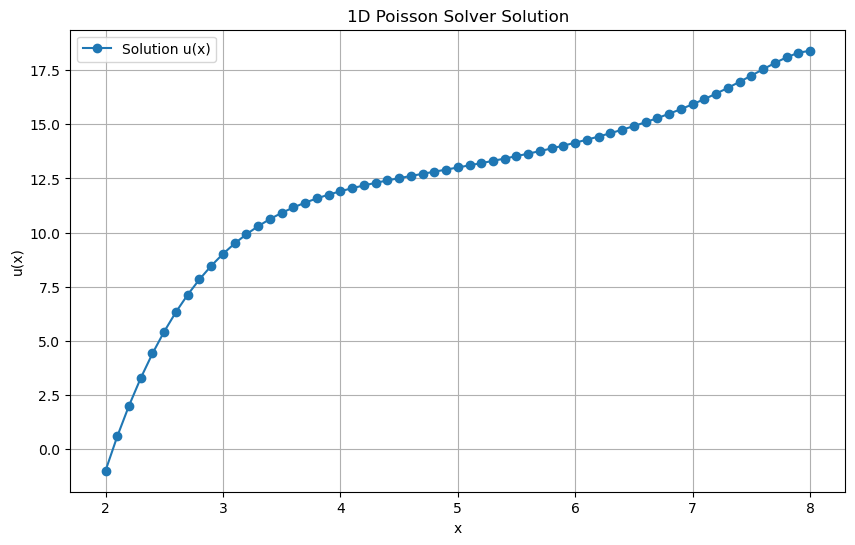